### Importación de datos



In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from folium.plugins import HeatMap as hm

url = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_1.csv"
url2 = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#tienda1.head()


#1. Análisis de facturación



In [ ]:
# Calcula los ingresos totales
ingresos_tienda1 = (tienda1['Precio']).sum()
ingresos_tienda2 = (tienda2['Precio']).sum()
ingresos_tienda3 = (tienda3['Precio']).sum()
ingresos_tienda4 = (tienda4['Precio']).sum()

# Imprime los ingresos con un formato adecuado
print(f"Ingresos tienda 1: {ingresos_tienda1:,.1f}")
print(f"Ingresos tienda 2: {ingresos_tienda2:,.1f}")
print(f"Ingresos tienda 3: {ingresos_tienda3:,.1f}")
print(f"Ingresos tienda 4: {ingresos_tienda4:,.1f}")

Ingresos tienda 1: 1,150,880,400.0
Ingresos tienda 2: 1,116,343,500.0
Ingresos tienda 3: 1,098,019,600.0
Ingresos tienda 4: 1,038,375,700.0


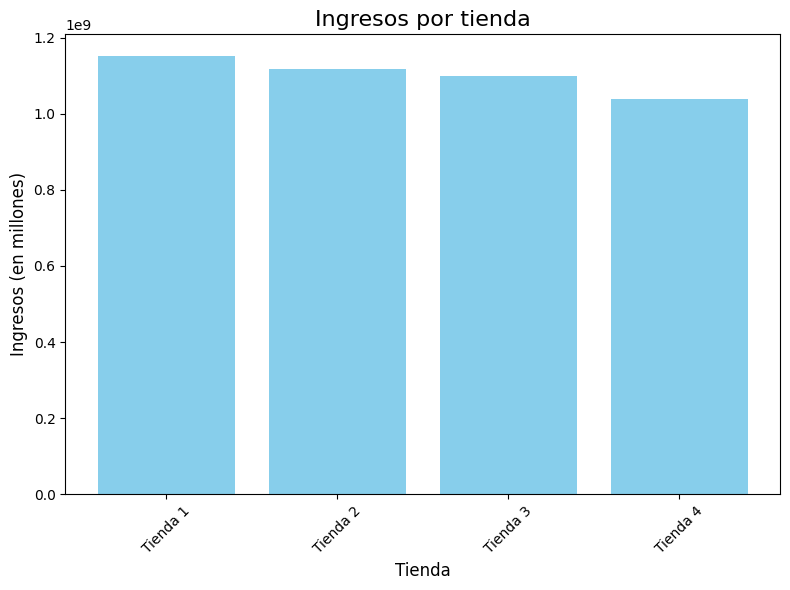

In [90]:
# Datos de los ingresos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]

# Crea gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(tiendas, ingresos, color='skyblue')

# Añade título y etiquetas
plt.title('Ingresos por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()


# 2. Ventas por categoría

In [ ]:
# Agrupa y cuenta la cantidad de productos vendidos en cada categoría para cada tienda
productos_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size().reset_index(name='Tienda 1')
productos_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Tienda 2')
productos_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Tienda 3')
productos_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Tienda 4')

tabla_completa = pd.merge(productos_por_categoria_tienda1, productos_por_categoria_tienda2, on='Categoría del Producto', how='outer')
tabla_completa = pd.merge(tabla_completa, productos_por_categoria_tienda3, on='Categoría del Producto', how='outer')
tabla_completa = pd.merge(tabla_completa, productos_por_categoria_tienda4, on='Categoría del Producto', how='outer')

# Asegurarse de que las cantidades sean enteros
tabla_completa[['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']] = tabla_completa[['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']].astype(int)

# Ordenar por la columna 'Tienda 1' de mayor a menor
tabla_completa = tabla_completa.sort_values(by='Tienda 1', ascending=False).reset_index(drop=True)

# Imprime la tabla final con las categorías y la cantidad de productos vendidos por tienda
print(tabla_completa.to_string(index=False))


 Categoría del Producto  Tienda 1  Tienda 2  Tienda 3  Tienda 4
                Muebles       465       442       499       480
           Electrónicos       448       422       451       451
               Juguetes       324       313       315       338
      Electrodomésticos       312       305       278       254
   Deportes y diversión       284       275       277       277
 Instrumentos musicales       182       224       177       170
                 Libros       173       197       185       187
Artículos para el hogar       171       181       177       201


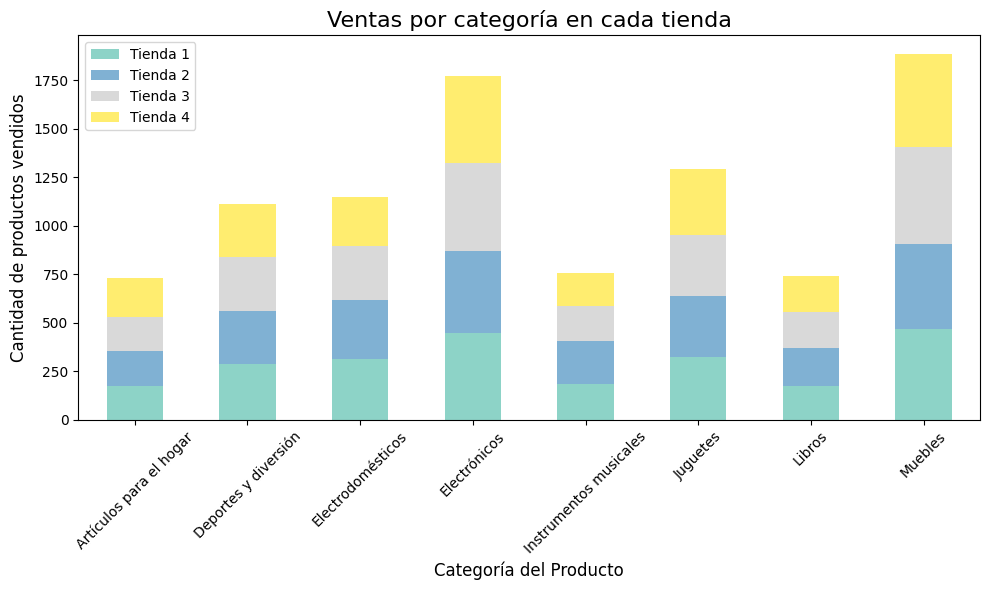

In [59]:
# Ventas por categoría para cada tienda
ventas_categoria_tienda1 = productos_por_categoria_tienda1.set_index('Categoría del Producto')['Tienda 1']
ventas_categoria_tienda2 = productos_por_categoria_tienda2.set_index('Categoría del Producto')['Tienda 2']
ventas_categoria_tienda3 = productos_por_categoria_tienda3.set_index('Categoría del Producto')['Tienda 3']
ventas_categoria_tienda4 = productos_por_categoria_tienda4.set_index('Categoría del Producto')['Tienda 4']

# Crea un DataFrame combinado para facilitar la visualización
ventas_categoria_completa = pd.DataFrame({
    'Tienda 1': ventas_categoria_tienda1,
    'Tienda 2': ventas_categoria_tienda2,
    'Tienda 3': ventas_categoria_tienda3,
    'Tienda 4': ventas_categoria_tienda4
}).fillna(0)

# Grafica ventas por categoría
ventas_categoria_completa.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')

# Añade título y etiquetas
plt.title('Ventas por categoría en cada tienda', fontsize=16)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad de productos vendidos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calcula la calificación promedio para cada tienda
promedio_calificacion_tienda1 = tienda1['Calificación'].mean()
promedio_calificacion_tienda2 = tienda2['Calificación'].mean()
promedio_calificacion_tienda3 = tienda3['Calificación'].mean()
promedio_calificacion_tienda4 = tienda4['Calificación'].mean()

# Imprime los resultados con formato de decimales
print(f"Promedio de calificación tienda 1: {promedio_calificacion_tienda1:.2f}")
print(f"Promedio de calificación tienda 2: {promedio_calificacion_tienda2:.2f}")
print(f"Promedio de calificación tienda 3: {promedio_calificacion_tienda3:.2f}")
print(f"Promedio de calificación tienda 4: {promedio_calificacion_tienda4:.2f}")

Promedio de calificación tienda 1: 3.98
Promedio de calificación tienda 2: 4.04
Promedio de calificación tienda 3: 4.05
Promedio de calificación tienda 4: 4.00


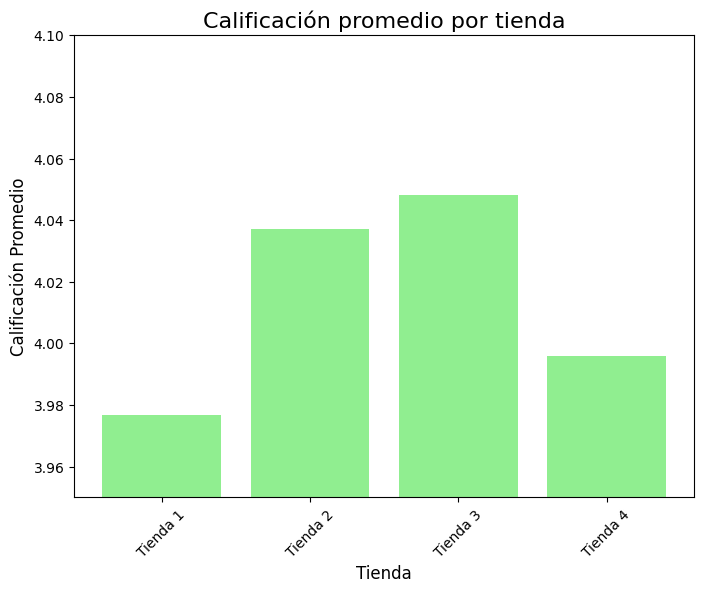

In [86]:
calificaciones = [promedio_calificacion_tienda1, promedio_calificacion_tienda2, promedio_calificacion_tienda3, promedio_calificacion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crea gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, calificaciones, color='lightgreen')

# Añade título y etiquetas
plt.title('Calificación promedio por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)

# Limita el eje Y para que las diferencias sean más visibles
plt.ylim(3.95, 4.1)

# Rueda las etiquetas de las tiendas para mejor legibilidad
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Cuenta la cantidad de ventas de cada producto (por el número de ocurrencias)
productos_vendidos_tienda1 = tienda1.groupby('Producto').size().reset_index(name='Ventas')
productos_vendidos_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Ventas')
productos_vendidos_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Ventas')
productos_vendidos_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Ventas')

# Ordena los productos por ventas
top5_mas_vendidos_tienda1 = productos_vendidos_tienda1.sort_values('Ventas', ascending=False).head(5).reset_index(drop=True)
top5_menos_vendidos_tienda1 = productos_vendidos_tienda1.sort_values('Ventas', ascending=True).head(5).reset_index(drop=True)

top5_mas_vendidos_tienda2 = productos_vendidos_tienda2.sort_values('Ventas', ascending=False).head(5).reset_index(drop=True)
top5_menos_vendidos_tienda2 = productos_vendidos_tienda2.sort_values('Ventas', ascending=True).head(5).reset_index(drop=True)

top5_mas_vendidos_tienda3 = productos_vendidos_tienda3.sort_values('Ventas', ascending=False).head(5).reset_index(drop=True)
top5_menos_vendidos_tienda3 = productos_vendidos_tienda3.sort_values('Ventas', ascending=True).head(5).reset_index(drop=True)

top5_mas_vendidos_tienda4 = productos_vendidos_tienda4.sort_values('Ventas', ascending=False).head(5).reset_index(drop=True)
top5_menos_vendidos_tienda4 = productos_vendidos_tienda4.sort_values('Ventas', ascending=True).head(5).reset_index(drop=True)

# Imprime los resultados con alineación estética
print("Top 5 productos más vendidos tienda 1:")
print(top5_mas_vendidos_tienda1[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))
print("\nTop 5 productos menos vendidos tienda 1:")
print(top5_menos_vendidos_tienda1[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))

print("\nTop 5 productos más vendidos tienda 2:")
print(top5_mas_vendidos_tienda2[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))
print("\nTop 5 productos menos vendidos tienda 2:")
print(top5_menos_vendidos_tienda2[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))

print("\nTop 5 productos más vendidos tienda 3:")
print(top5_mas_vendidos_tienda3[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))
print("\nTop 5 productos menos vendidos tienda 3:")
print(top5_menos_vendidos_tienda3[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))

print("\nTop 5 productos más vendidos tienda 4:")
print(top5_mas_vendidos_tienda4[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))
print("\nTop 5 productos menos vendidos tienda 4:")
print(top5_menos_vendidos_tienda4[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))


Top 5 productos más vendidos tienda 1:
    Producto          Ventas    
         Armario        60      
   TV LED UHD 4K        60      
      Microondas        60      
Secadora de ropa        58      
   Mesa de noche        56      

Top 5 productos menos vendidos tienda 1:
          Producto               Ventas    
  Auriculares con micrófono        33      
               Celular ABXY        33      
            Olla de presión        35      
                  Pandereta        36      
Ciencia de datos con Python        39      

Top 5 productos más vendidos tienda 2:
         Producto              Ventas    
Iniciando en programación        65      
               Microondas        62      
                  Batería        61      
                Pandereta        58      
        Guitarra acústica        58      

Top 5 productos menos vendidos tienda 2:
    Producto         Ventas    
  Juego de mesa        32      
      Impresora        34      
Mesa de comedor        34  

# 5. Envío promedio por tienda

In [ ]:
# Calcula el costo de envío promedio por tienda
costo_envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Imprime los resultados con un formato claro
print(f"Costo de envío promedio tienda 1: ${costo_envio_promedio_tienda1:,.2f}")
print(f"Costo de envío promedio tienda 2: ${costo_envio_promedio_tienda2:,.2f}")
print(f"Costo de envío promedio tienda 3: ${costo_envio_promedio_tienda3:,.2f}")
print(f"Costo de envío promedio tienda 4: ${costo_envio_promedio_tienda4:,.2f}")

Costo de envío promedio tienda 1: $26,018.61
Costo de envío promedio tienda 2: $25,216.24
Costo de envío promedio tienda 3: $24,805.68
Costo de envío promedio tienda 4: $23,459.46


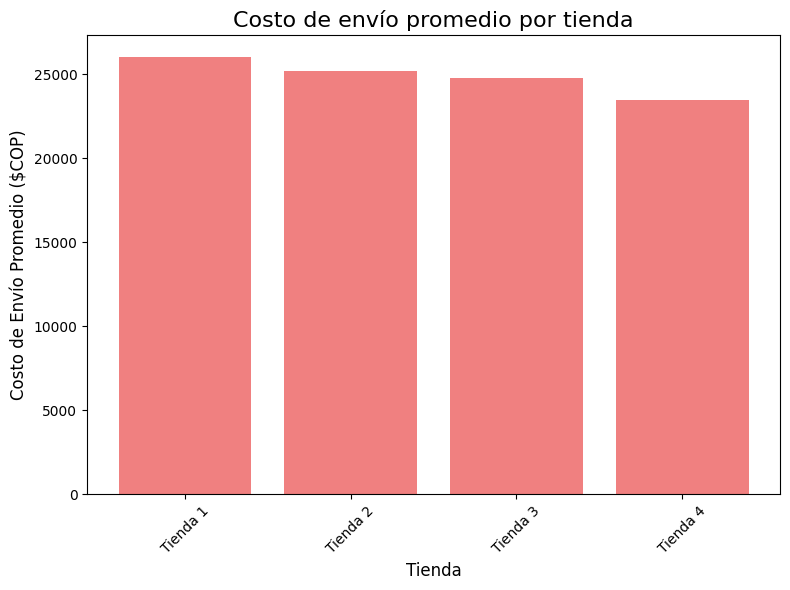

In [92]:
costos_envio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]

# Crea gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(tiendas, costos_envio, color='lightcoral')

# Añade título y etiquetas
plt.title('Costo de envío promedio por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio ($COP)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()

# 6. Ventas a lo largo del tiempo

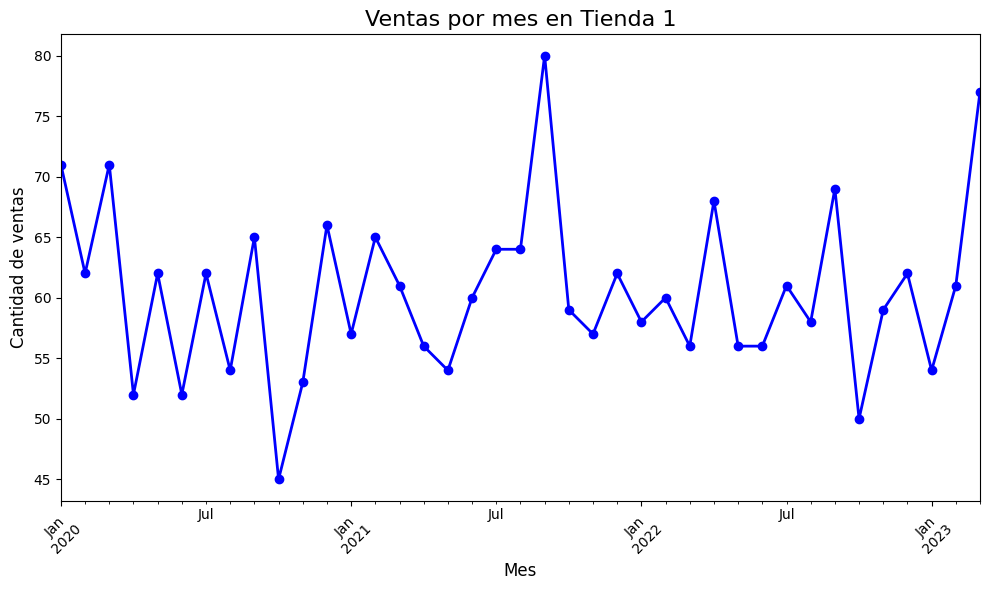

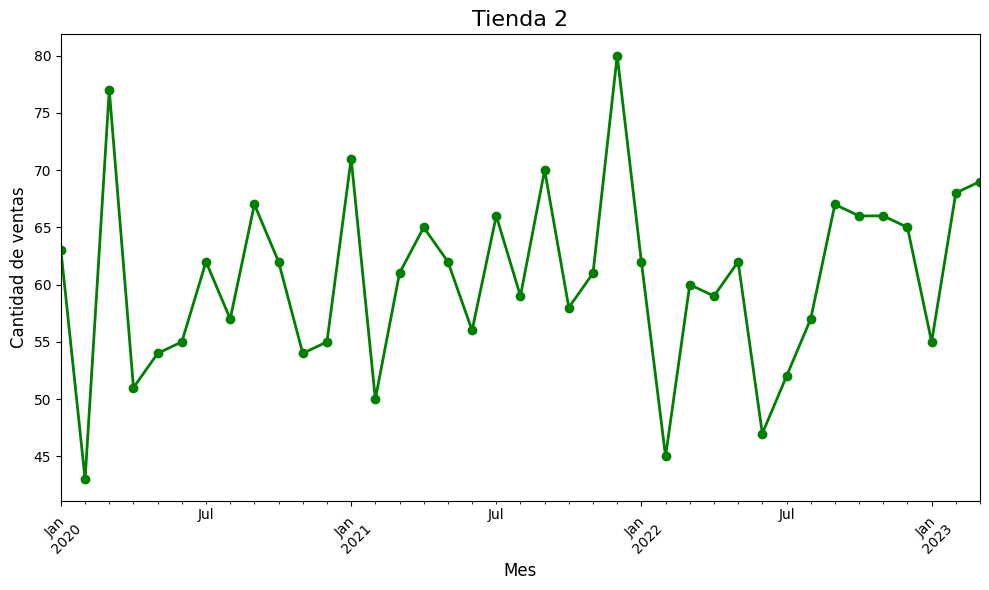

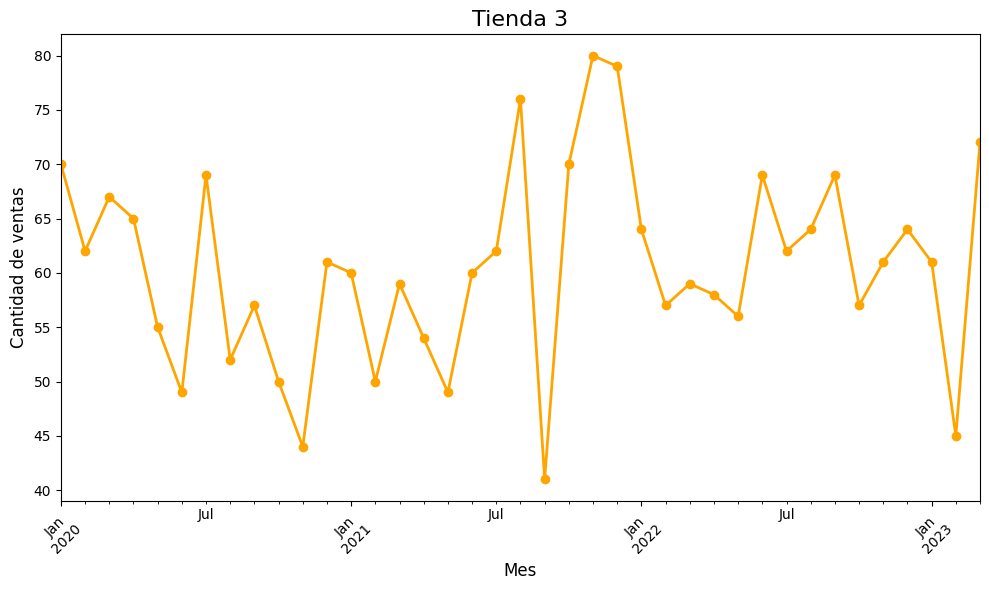

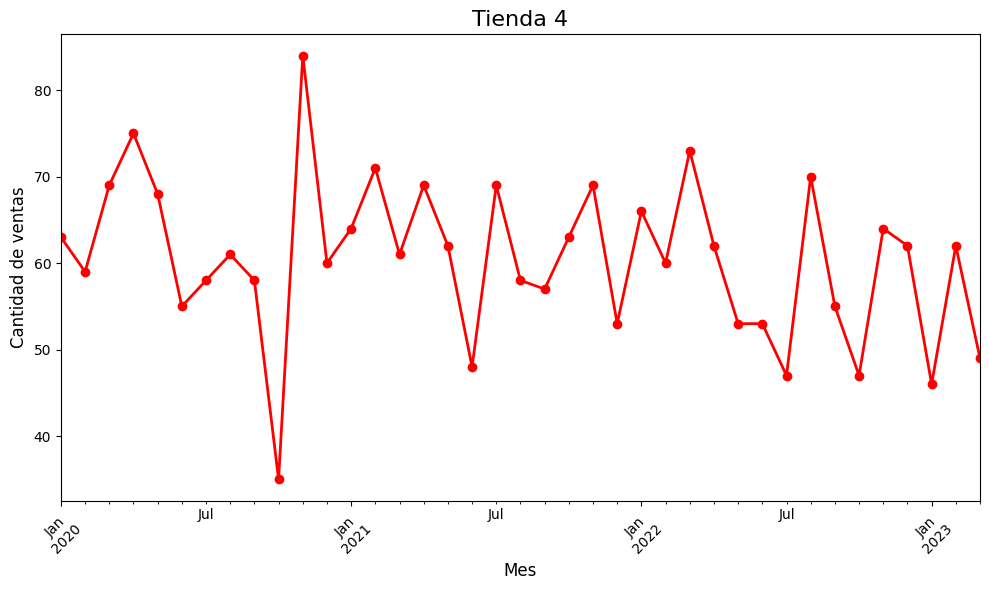

In [105]:
# Tienda 1
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], dayfirst=True)
ventas_tienda1_por_fecha = tienda1.groupby(tienda1['Fecha de Compra'].dt.to_period('M')).size()

# Grafica las ventas por fecha
plt.figure(figsize=(10, 6))
ventas_tienda1_por_fecha.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)

# Títulos y etiquetas
plt.title('Ventas por mes en Tienda 1', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()

# Tienda 2
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
ventas_tienda2_por_fecha = tienda2.groupby(tienda2['Fecha de Compra'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
ventas_tienda2_por_fecha.plot(kind='line', color='green', marker='o', linestyle='-', linewidth=2)

plt.title('Tienda 2', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Tienda 3
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
ventas_tienda3_por_fecha = tienda3.groupby(tienda3['Fecha de Compra'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
ventas_tienda3_por_fecha.plot(kind='line', color='orange', marker='o', linestyle='-', linewidth=2)

plt.title('Tienda 3', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Tienda 4
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)
ventas_tienda4_por_fecha = tienda4.groupby(tienda4['Fecha de Compra'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
ventas_tienda4_por_fecha.plot(kind='line', color='red', marker='o', linestyle='-', linewidth=2)

plt.title('Tienda 4', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 7. Distribución de ventas por categoria

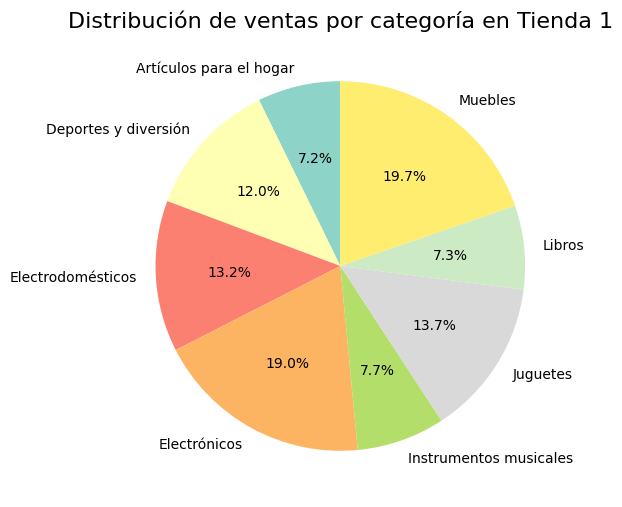

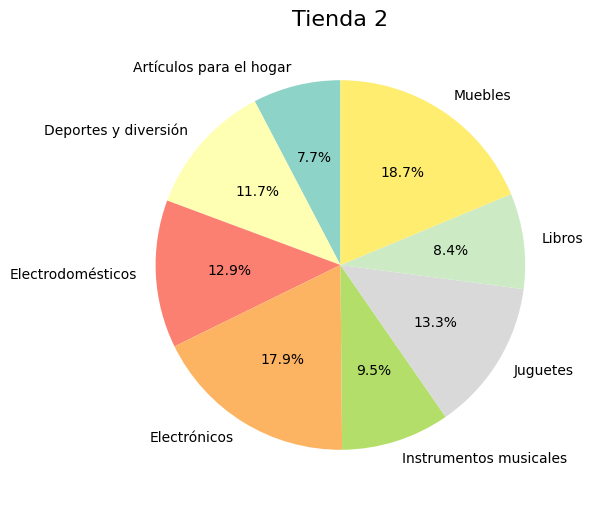

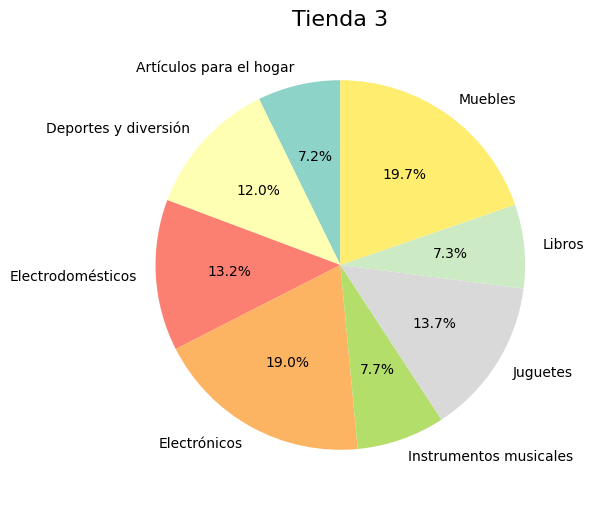

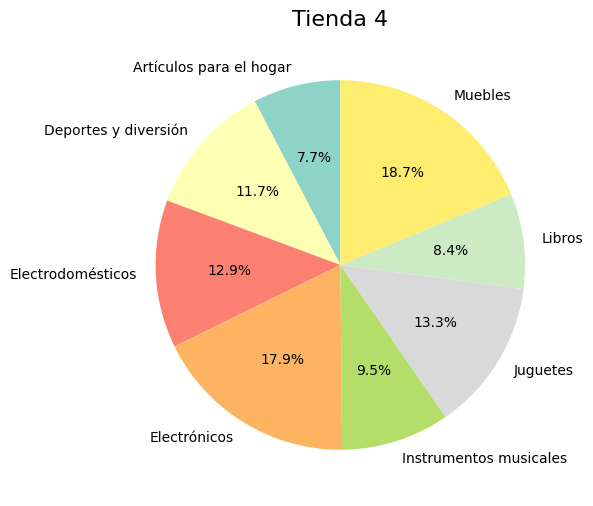

In [114]:
# Tienda 1
categoria_ventas_tienda1 = tienda1.groupby('Categoría del Producto').size()

# Crea gráfico de pastel
plt.figure(figsize=(8, 6))
categoria_ventas_tienda1.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Formato
plt.title('Distribución de ventas por categoría en Tienda 1', fontsize=16)
plt.ylabel('')  # Eliminar la etiqueta del eje y

# Muestra gráfico
plt.show()

# Tienda 2
categoria_ventas_tienda2 = tienda2.groupby('Categoría del Producto').size()

plt.figure(figsize=(8, 6))
categoria_ventas_tienda2.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

plt.title('Tienda 2', fontsize=16)
plt.ylabel('')

plt.show()

# Tienda 3
categoria_ventas_tienda3 = tienda3.groupby('Categoría del Producto').size()

plt.figure(figsize=(8, 6))
categoria_ventas_tienda1.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

plt.title('Tienda 3', fontsize=16)
plt.ylabel('')

plt.show()

# Tienda 4
categoria_ventas_tienda4 = tienda4.groupby('Categoría del Producto').size()

plt.figure(figsize=(8, 6))
categoria_ventas_tienda2.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Formato
plt.title('Tienda 4', fontsize=16)
plt.ylabel('')

plt.show()


# 8. Distribución de ventas por ubicación geofráfica

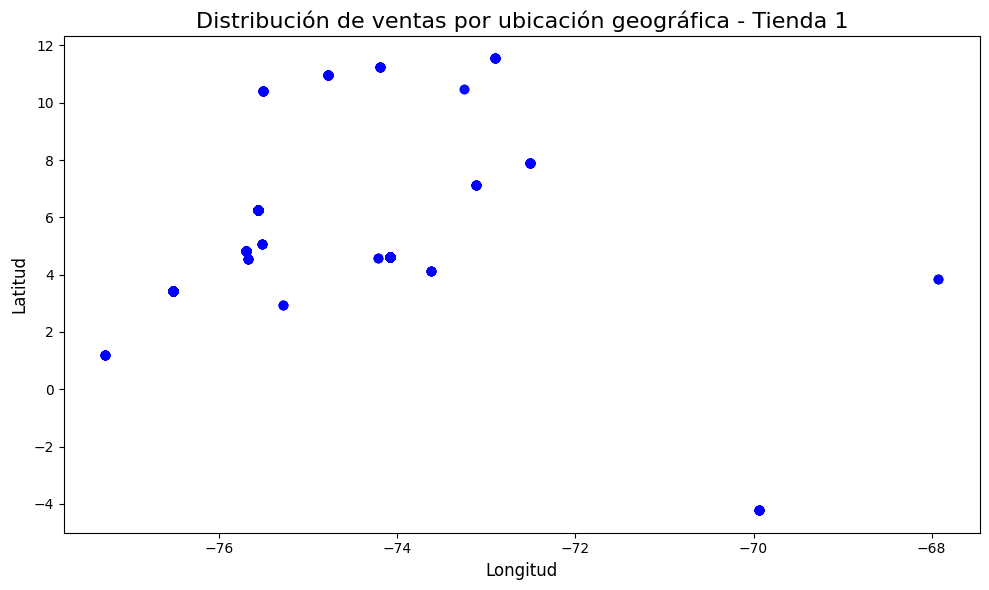

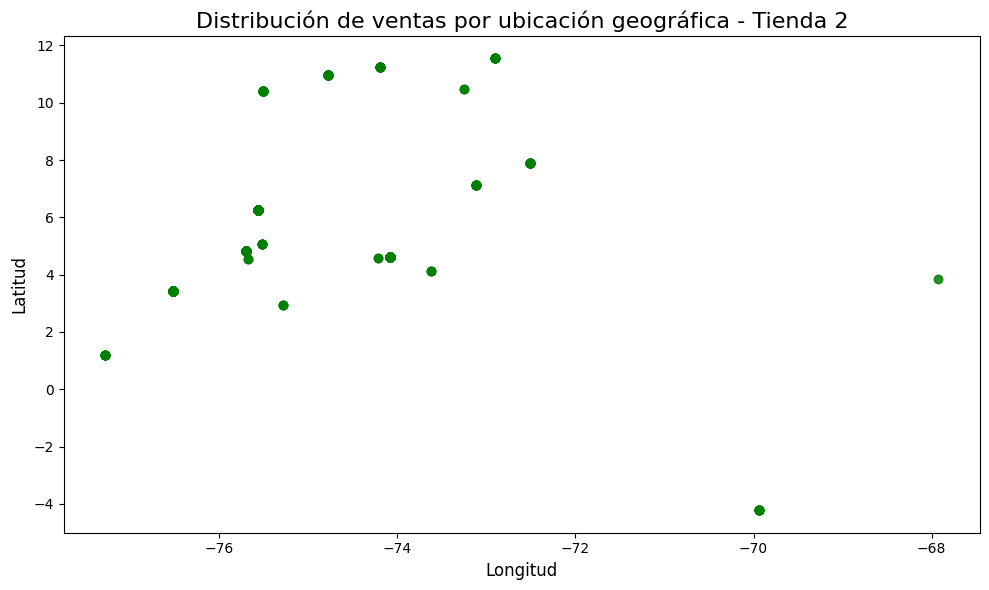

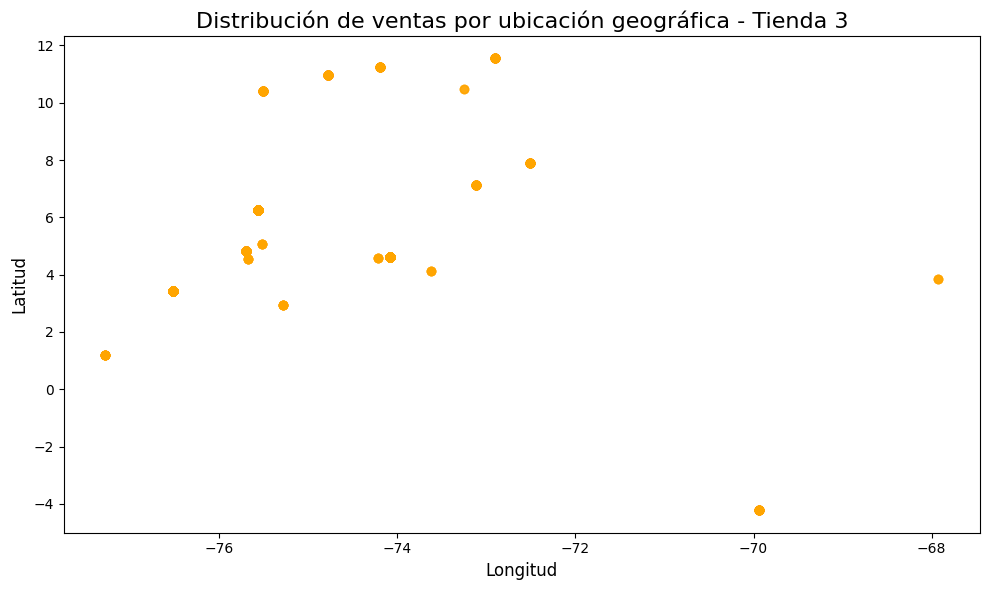

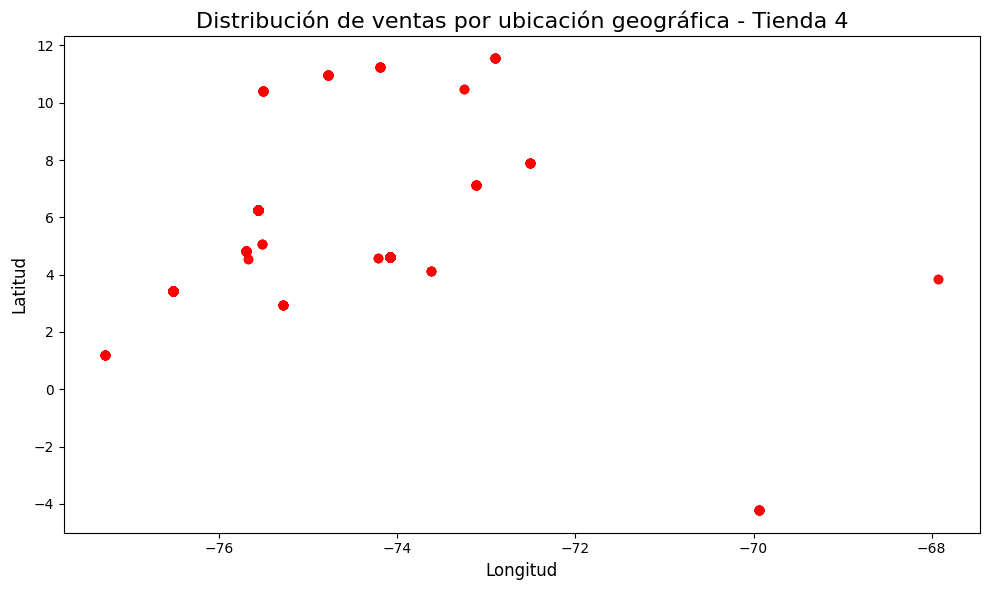

In [107]:
# Crea gráficos de dispersión para las ventas de cada tienda
def scatter_plot(tienda, tienda_nombre, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(tienda['lon'], tienda['lat'], alpha=0.6, color=color)
    plt.title(f"Distribución de ventas por ubicación geográfica - {tienda_nombre}", fontsize=16)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)
    plt.tight_layout()
    plt.show()

# Llamar a la función para cada tienda
scatter_plot(tienda1, 'Tienda 1', 'blue')
scatter_plot(tienda2, 'Tienda 2', 'green')
scatter_plot(tienda3, 'Tienda 3', 'orange')
scatter_plot(tienda4, 'Tienda 4', 'red')
